<a href="https://colab.research.google.com/github/alik604/Notebooks/blob/master/coopLearningOutcomesProject/SPX_500_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TODO; notebooks repo has updated version...

# Stock Anomaly Detection Notebook 
### TODO 
and nasdaq (QQQ).. test iso forest for him dimm dataset(s) 

then create a stack of finance related stock and rerun.... fry my cpu :'( 

list of sources 
* https://github.com/edyoda/data-science-complete-tutorial/blob/master/13.%20Anomaly%20Detection.ipynb



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#!pip install yfinance
import yfinance as yf # https://github.com/ranaroussi/yfinance


from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

%config IPCompleter.greedy=True
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
SPY = yf.Ticker("spy")
SPY = SPY.history(period='20y')
SPY_open = pd.DataFrame({'close':SPY["Close"]})
SPY_open.head(10)

,close
Date,
2000-07-18,102.40
2000-07-19,101.58
2000-07-20,102.99
2000-07-21,100.98
2000-07-24,100.41
2000-07-25,100.73
2000-07-26,99.74
2000-07-27,99.40
2000-07-28,97.16


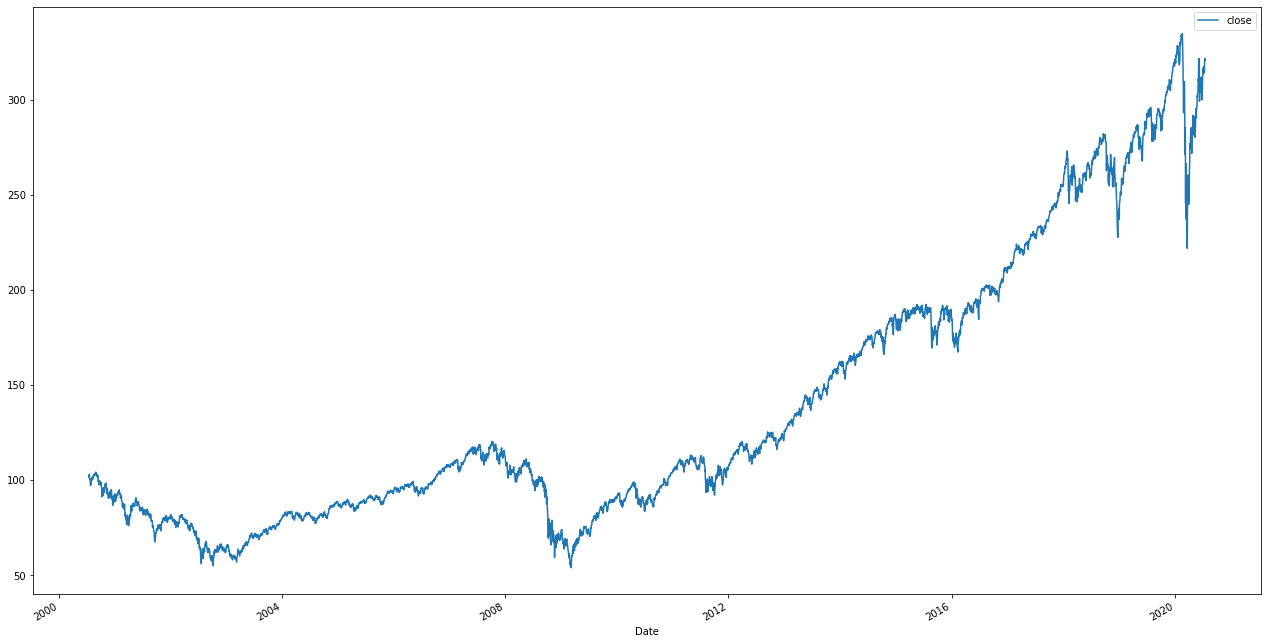

In [3]:
spy = SPY_open
spy.plot(figsize=(22,12), use_index=True)

In [4]:
x= spy.close.values # ndarray 
X = x.reshape(-1,1)

## K-Means Shit 

ya.. thats a pun on this shitty useless method  

In [5]:
km = KMeans(80).fit(X)
# plt.figure(figsize=(12,6))
# plt.plot(km.cluster_centers_)
print(km.predict([[3000]]))
x[3000]

[44]


115.39

In [6]:
print(km.predict([[1000]]))
x[1000]

[44]


80.75

## IsolationForest.. when your forever alone.. in a forest of uselessness 

In [7]:
clf = IsolationForest(max_samples='auto', contamination=.05,\
                      n_estimators=1000, \
                      random_state=19117,  max_features=X.shape[1],behaviour='new') #  added : behaviour='new'

#.025 , .22 ,.15 

In [8]:
pred =clf.fit(X)
 

/Users/alik604/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


In [9]:
 p = pred.predict(X)

### Well this is fucking useless 


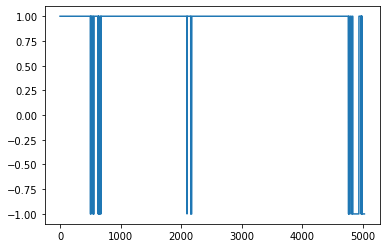

In [10]:
#plt.figure(figsize=(12,6))
plt.plot(p)

### Let's figure out how to plot it...


In [11]:
arry = p.reshape(1,-1)[0]
itemindex = np.where(arry==-1)
#itemindex

<Figure size 1800x864 with 0 Axes>

Text(0.5, 1.0, 'IsolationForest - S&P 500')

[]

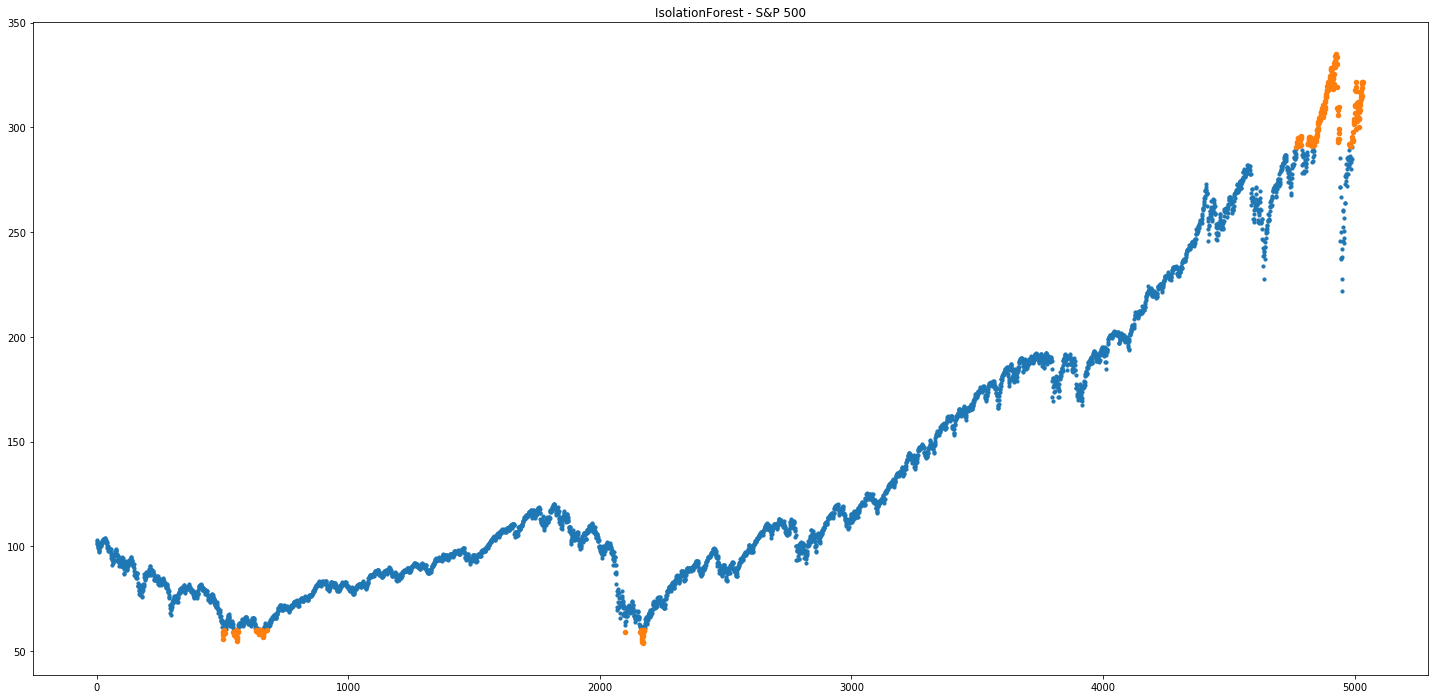

In [12]:
plt.figure(figsize=(25,12))
plt.title("IsolationForest - S&P 500")
x_axis = range(len(x))
out = plt.scatter(x_axis,y=x,s=10)
plt.scatter(itemindex,x[itemindex],s=20)
plt.plot()

In [13]:
anomalies = pd.DataFrame({
    'x' :list(itemindex)[0], 'y': x[itemindex]

})
anomalies
#anomalies.plot(x='x',y='y',figsize=(24,12), kind='scatter')

,x,y
0,501,59.37
1,502,57.61
2,503,56.03
3,504,59.37
4,505,58.87
...,...,...
247,5027,314.84
248,5028,318.92
249,5029,321.85
250,5030,320.79


## Lets try GaussianMixture 

In [14]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [15]:
pred = gmm.predict(X)
pred_prob = gmm.predict_proba(X)
scores= gmm.score_samples(X)
scoresMean = scores.mean()

In [16]:
#print(pred[:1000])

In [17]:
arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry>0)


<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'GaussianMixture - S&P 500')

[]

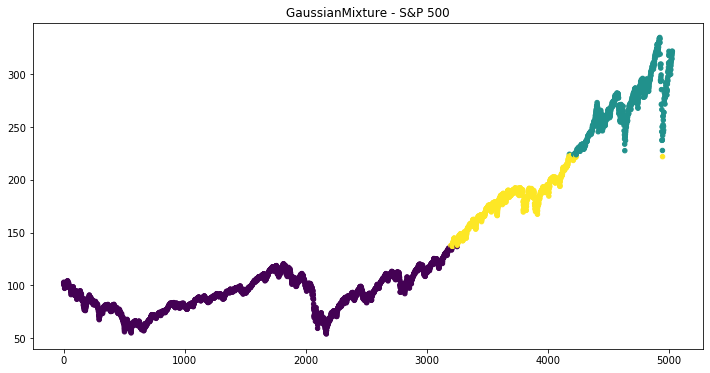

In [18]:
plt.figure(figsize=(12,6))
plt.title("GaussianMixture - S&P 500")
x_axis = range(len(x))
out = plt.scatter(x_axis,y=x,s=20,c=pred) # added c=pred
#plt.scatter(itemindex,x[itemindex],s=20,color='r') #

plt.plot()

Ive got no clue how/why this is considered as 'useful'... let's move on..

## OK lets try what EllipticEnvelope is  

In [19]:
SPY = yf.Ticker("spx")
SPY = SPY.history(period='20y')
SPY_open = pd.DataFrame({'close':SPY["Close"]})

x= spy.close.values # ndarray 
X = x.reshape(-1,1)


from sklearn.covariance import EllipticEnvelope
ev = EllipticEnvelope(contamination=.15)
ev.fit(X)

EllipticEnvelope(assume_centered=False, contamination=0.15, random_state=None,
                 store_precision=True, support_fraction=None)

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'EllipticEnvelope - S&P 500')

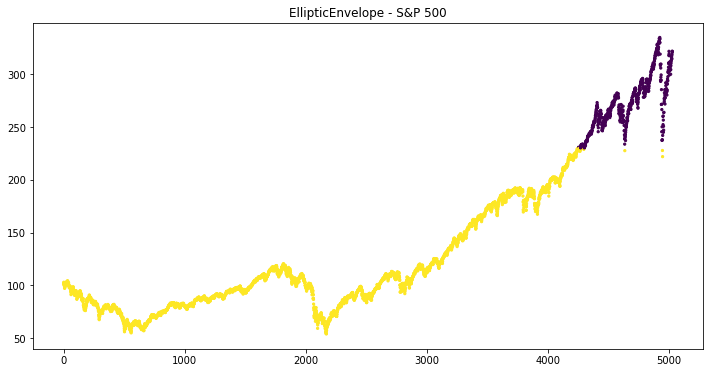

In [20]:
cluster = ev.predict(X)

plt.figure(figsize=(12,6))
plt.title("EllipticEnvelope - S&P 500")
plt.scatter(range(len(X)), X,s=5,c=cluster)

well thats also useless...

## Let's try OneClassSVM 

In [21]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(degree=5)
svm.fit(X)
pred = svm.predict(X)

OneClassSVM(cache_size=200, coef0=0.0, degree=5, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [22]:
arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==-1)
print('len of arry:      ',len(arry))
print('len of itemindex: ',len(itemindex[0]))

len of arry:       5032
len of itemindex:  2518


<Figure size 1728x864 with 0 Axes>

Text(0.5, 1.0, 'OneClassSVM - S&P 500')

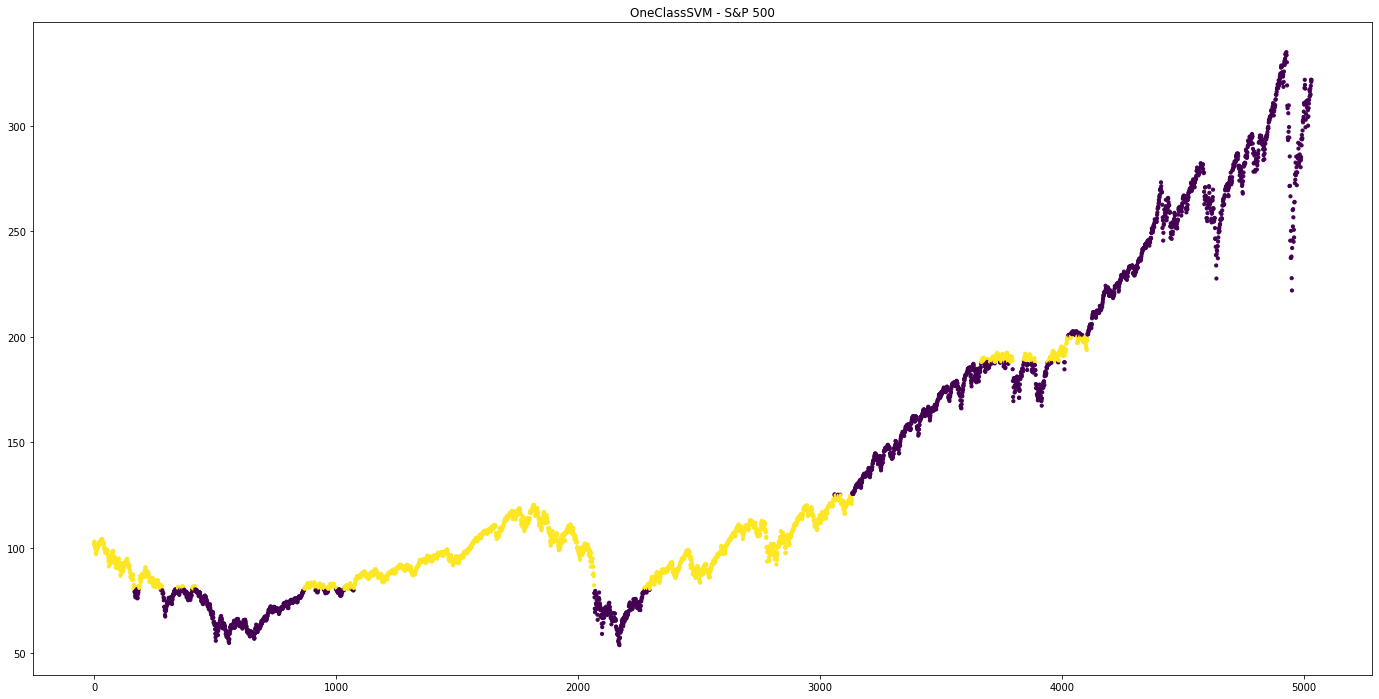

In [23]:
plt.figure(figsize=(24,12))
plt.title("OneClassSVM - S&P 500")
plt.scatter(range(len(X)), X,s=10,c=pred)

<Figure size 1728x864 with 0 Axes>

Text(0.5, 1.0, 'OneClassSVM - S&P 500')

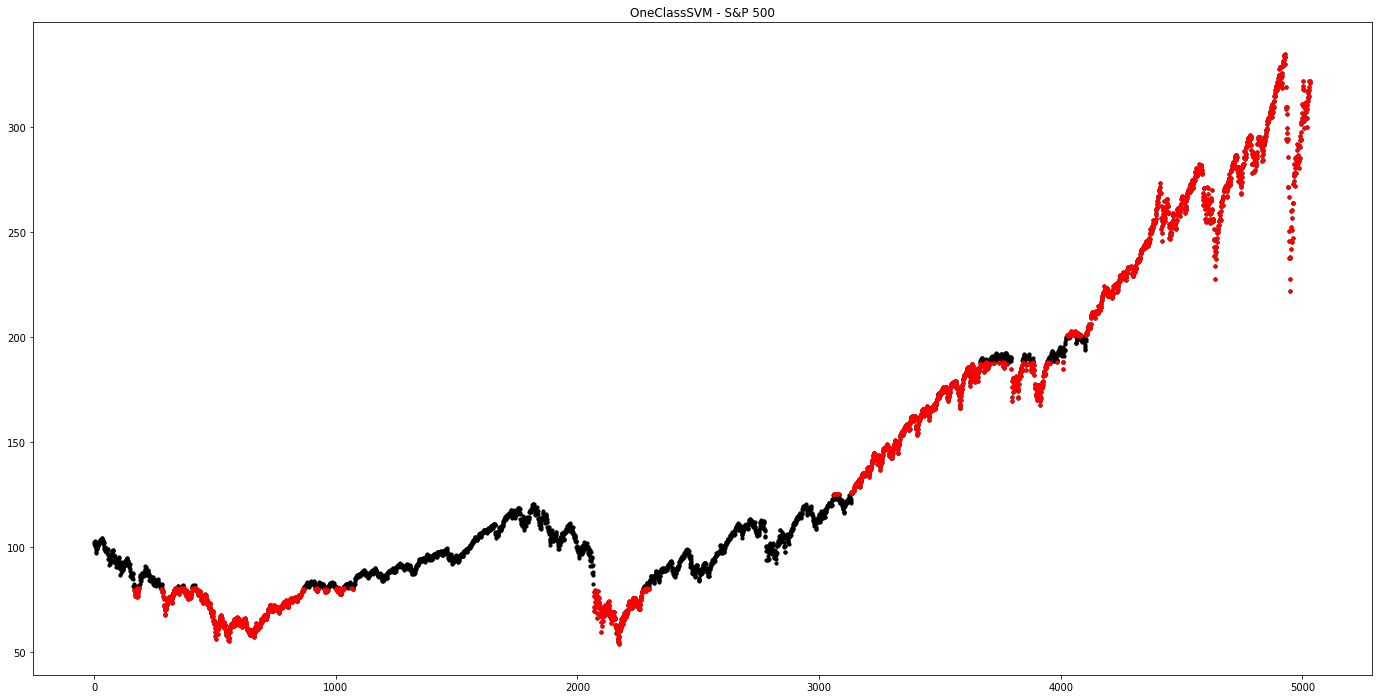

In [24]:
plt.figure(figsize=(24,12))
plt.title("OneClassSVM - S&P 500")
plt.scatter(range(len(X)), X,s=10,c='k')
plt.scatter(itemindex,x[itemindex],s=10,color='r') #

## Let's try LocalOutLierFactor 

In [25]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=40,contamination ='auto')#.05
pred = lof.fit_predict(X)

arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==-1)
print('len of arry:      ',len(arry))
print('len of itemindex: ',len(itemindex[0]))

len of arry:       5032
len of itemindex:  43


<Figure size 1728x864 with 0 Axes>

Text(0.5, 1.0, 'LocalOutlierFactor - S&P 500')

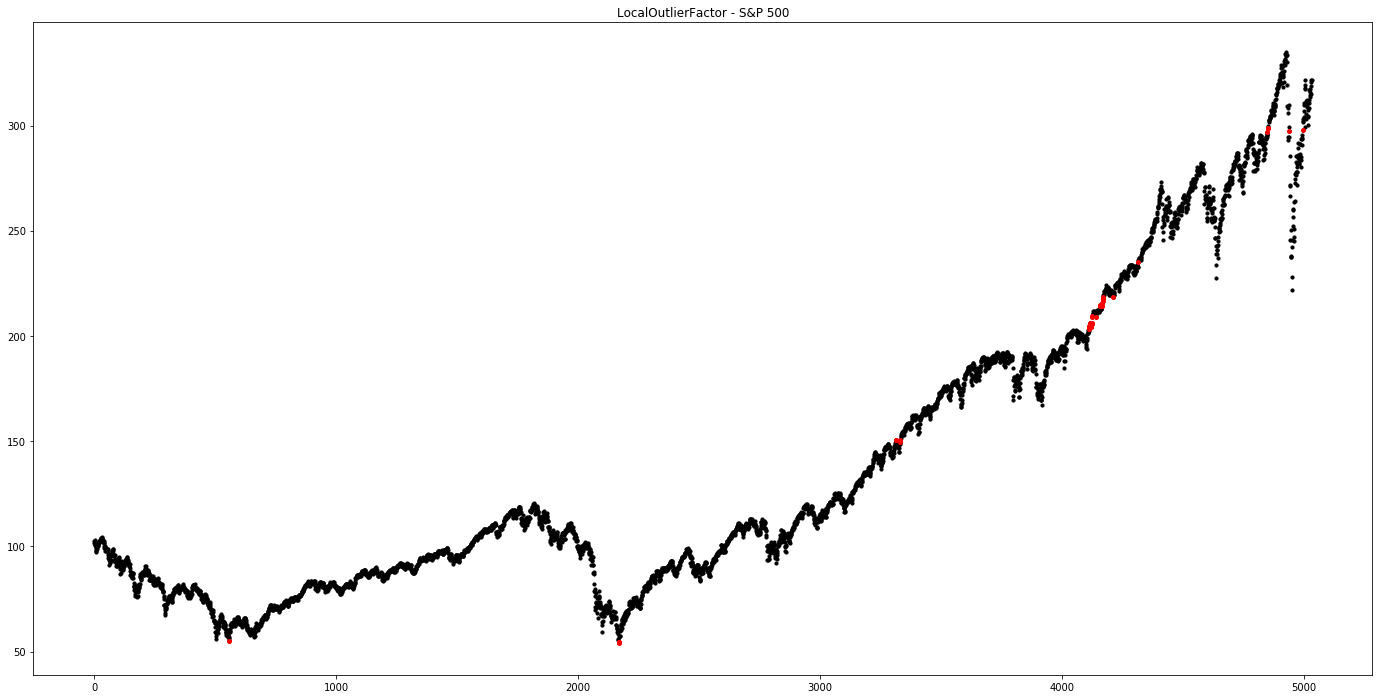

In [26]:
plt.figure(figsize=(24,12))
plt.title("LocalOutlierFactor - S&P 500")
plt.scatter(range(len(X)), X,s=10,c='k')
plt.scatter(itemindex,x[itemindex],s=15,color='r') #

len of arry:       5032
len of itemindex:  252


<Figure size 1728x864 with 0 Axes>

Text(0.5, 1.0, 'LocalOutlierFactor - S&P 500')

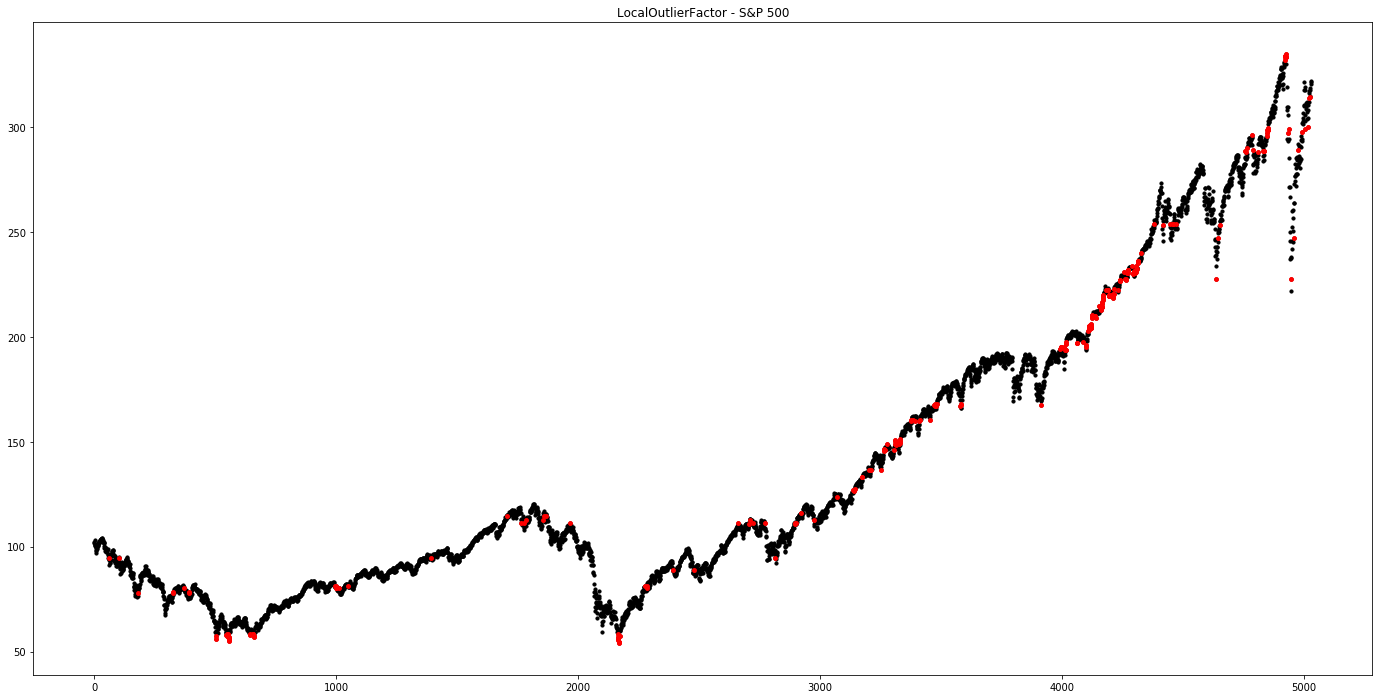

In [27]:
lof = LocalOutlierFactor(n_neighbors=20,algorithm='auto',leaf_size=40,contamination =.05)#.05
pred = lof.fit_predict(X)

arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==-1)
print('len of arry:      ',len(arry))
print('len of itemindex: ',len(itemindex[0]))

plt.figure(figsize=(24,12))
plt.title("LocalOutlierFactor - S&P 500")
plt.scatter(range(len(X)), X,s=10,c='k')
plt.scatter(itemindex,x[itemindex],s=15,color='r') #

# so IsolationForest, and LocalOutlierFactor are the best

## Let's try DBscan

 tune eps to get  < 3% in itemindex (number of anomalies) 

In [28]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=.45,leaf_size=500)

pred = dbscan.fit_predict(X)
arry = pred.reshape(1,-1)[0]
itemindex = np.where(arry==-1)

print('\nlen of arry:      ',len(arry))
print('len of itemindex: ',len(itemindex[0]))
arry


len of arry:       5032
len of itemindex:  100


array([ 0,  0,  0, ..., 38, -1, 38])

**NOISY SAMPLES**

<Figure size 1728x864 with 0 Axes>

Text(0.5, 1.0, 'DBSCAN NOISY SAMPLES - S&P 500')

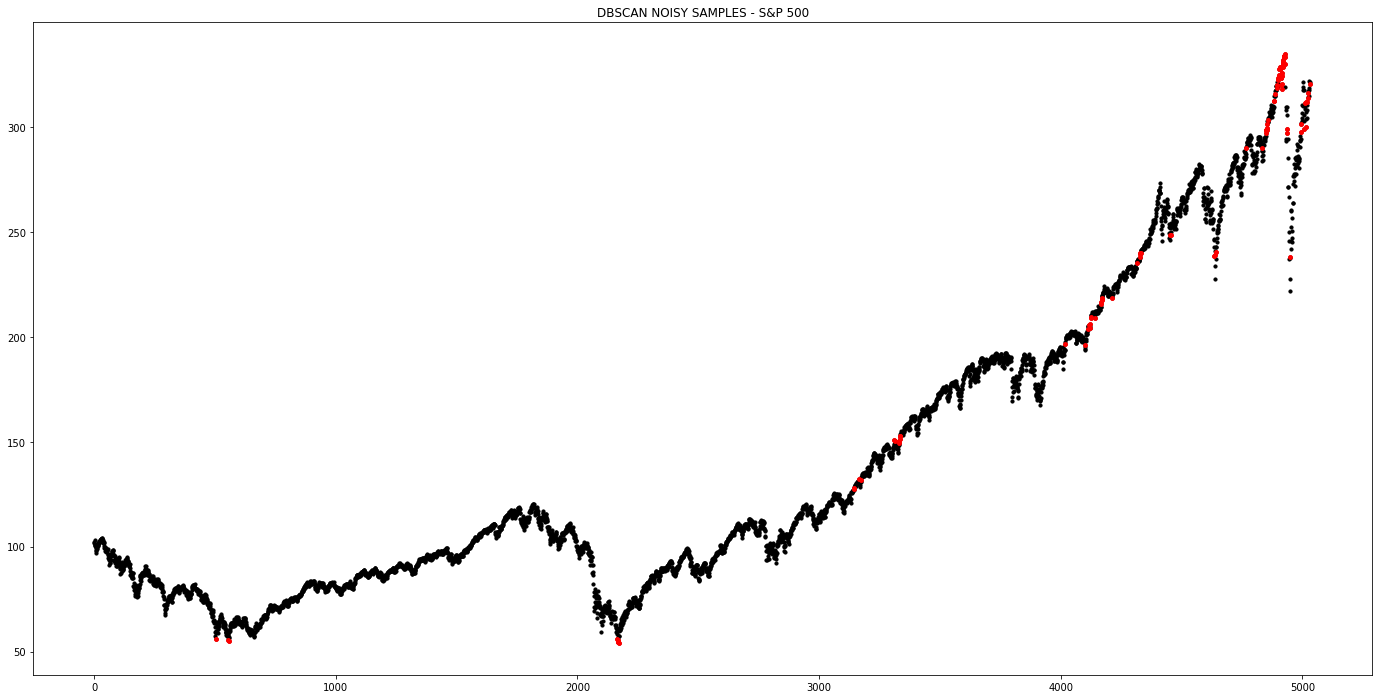

In [29]:
plt.figure(figsize=(24,12))
plt.title("DBSCAN NOISY SAMPLES - S&P 500")
plt.scatter(range(len(X)), X,s=10,c='k')
plt.scatter(itemindex,x[itemindex],s=15,color='r') #

Text(0.5, 1.0, 'DBSCAN - S&P 500')

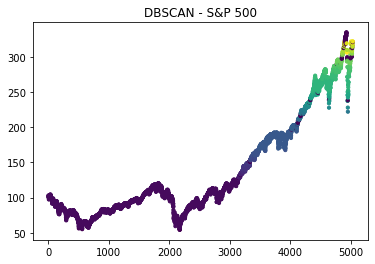

In [30]:
#plt.figure(figsize=(24,12))
plt.title("DBSCAN - S&P 500")
plt.scatter(range(len(X)), X,s=10,c=dbscan.labels_)

In [31]:
print(len(set(dbscan.labels_)), "fuckin clusters....")

41 fuckin clusters....


# let's try using pyod

In [32]:
import gc 
gc.collect()
# !pip install pyod

2520

In [33]:
# from pyod.models.knn import KNN
# from pyod.models.iforest import IForest
# from pyod.models.lof import LOF
# from pyod.models.auto_encoder import AutoEncoder

# from pyod.models.abod import ABOD

# abod= ABOD(contamination=0.1)
# pred=abod.fit_predict(X)
# arry = pred.reshape(1,-1)[0]
# itemindex = np.where(arry==-1)

# print('\nlen of arry:      ',len(arry))
# print('len of itemindex: ',len(itemindex[0]))
# arry


# I didn't like that library; let's try another library